In [4]:
from PIL import Image, ImageDraw
import numpy as np

#Tworzenie animacji 

Przykład 1

In [5]:
images = [] # sekwencja obrazów

width = 200
center = width // 2
color_1 = (0, 0, 0)
color_2 = (255, 255, 255)
max_radius = int(center * 1.5)
step = 8

for i in range(0, max_radius, step):
    im = Image.new('RGB', (width, width), color_1)
    draw = ImageDraw.Draw(im)
    draw.ellipse((center - i, center - i, center + i, center + i), fill=color_2)
    images.append(im) # dodajemy obraz do sekwencji

for i in range(0, max_radius, step):
    im = Image.new('RGB', (width, width), color_2)
    draw = ImageDraw.Draw(im)
    draw.ellipse((center - i, center - i, center + i, center + i), fill=color_1)
    images.append(im) # dodajemy obraz do sekwencji

images[0].save('kola.gif',
               save_all=True, append_images=images[1:], optimize=False, duration=40, loop=0)


Przykład 2

In [6]:
im0 = Image.open('mMi.jpeg')
print(im0.size, im0.mode)
w,h = im0.size
im = im0.crop((190, 0, 420, h))

(620, 413) RGB


In [7]:
def roll(image, delta): 
    xsize, ysize = image.size
    image1 = image.copy()
    delta = delta % xsize
    if delta == 0: return image1
    part1 = image.crop((0, 0, delta, ysize))
    part2 = image.crop((delta, 0, xsize, ysize))
    image1.paste(part1, (xsize - delta, 0))
    image1.paste(part2, (0, 0))
    return image1


frames = []
for i in range(1, im.size[0]):
    image = roll(im, i) 
    frames.append(image)

frames[0].save('roll.gif',  format='GIF', 
               save_all=True, append_images=frames[1:], optimize=True, duration=40, loop=0)


Przykład 3

In [8]:
im0 = Image.open('mMi.jpeg')
print(im0.size, im0.mode)
w,h = im0.size
image = im0.crop((190, 0, 420, h))

def utnij(image, delta): 
    w, h = image.size
    delta = min(delta, w // 2, h // 2)
    delta = delta % w
    if delta == 0: return image
    im = image.crop((delta, delta,  w-delta, h-delta))
    return im


frames = []
delta = 1
for i in range(1, image.size[0] ):
    new = Image.new('RGB', image.size, (0,0,0))
    ut = utnij(image, delta*i)
    # ut.show()
    new.paste(ut, (delta*i, delta*i))
    # new.show()
    frames.append(new)

frames[0].save('znika.gif',  format='GIF', 
               save_all=True, append_images=frames[1:], optimize=False, duration=140, loop=0)




(620, 413) RGB


Przykład 4

(354, 346) RGB


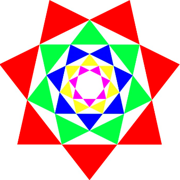

In [9]:
im0 = Image.open('gwiazda.png')
print(im0.size, im0.mode)
w,h = im0.size
im = im0.resize((180,180))
im

In [10]:
tlo = Image.new("RGB", (270,270), (255,255,255))

frames = []

for i in range(1, 360):
    tlo1 = tlo.copy()
    im1 = im.rotate(i, expand=1, fillcolor=(0,255,255))
    srodek = (tlo.size[0]//2, tlo.size[1]//2)
    tlo1.paste(im1, (srodek[0]-im1.size[0]//2, srodek[1]-im1.size[1]//2))
    frames.append(tlo1)

frames[0].save('gwiazda.gif',  format='GIF', 
               save_all=True, append_images=frames[1:], optimize=False, duration=140, loop=0)


In [11]:
im0 = Image.open('mMi.jpeg')
print(im0.size, im0.mode)
w,h = im0.size
tlo = Image.new("RGB", (w,h), (255,0,0))

frames = []
delta = 1
for alfa in np.linspace(0,1,20):
    frames.append( Image.blend(im0, tlo, alpha=alfa))
for alfa in np.linspace(0,1,20):
    frames.append( Image.blend(tlo, im0, alpha=alfa))

frames[0].save('blend.gif',  format='GIF', 
               save_all=True, append_images=frames[1:], optimize=False, duration=140, loop=0)




(620, 413) RGB
